In [7]:
!pip install html5lib
!pip install nbformat
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install beautifulsoup4
!pip install requests

import yfinance as yf
import pandas as pd
import matplotlib_inline
import requests
from bs4 import BeautifulSoup
import html5lib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 125.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 104.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 100.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 35.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=fad748c0132720f159540ec571bfaba29ae995fcccf7ef916593d3842d36a8c4
  Stored in directory: /home/jupyterlab/.cache/pip

# Question 1: Use yfinance to Extract Stock Data

 Reset the index, save, and display the first five rows  of the tesla_data dataframe using the head function. 


In [10]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data


Display the last five rows of the tesla_revenue dataframe using the tail function. 

In [12]:
from io import StringIO
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenues = pd.read_html(StringIO(str(soup)), match="Tesla Quarterly Revenue")[0]
tesla_revenues.columns = ['Date', 'Revenue']
tesla_revenues["Revenue"] = tesla_revenues["Revenue"].str.replace(',|\$', "", regex=True)
tesla_revenues.dropna(inplace=True)
tesla_revenues = tesla_revenues[tesla_revenues['Revenue'] != ""]
tesla_revenues.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [13]:
gme = yf.Ticker("GME")
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. 

In [15]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenues = pd.read_html(StringIO(str(soup)), match="Tesla Quarterly Revenue")[0]
tesla_revenues.columns = ['Date', 'Revenue']
tesla_revenues["Revenue"] = tesla_revenues["Revenue"].str.replace(r'[,\$]', '', regex=True).astype(float)
tesla_revenues.tail()


,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,NaN
52,2009-09-30,46.0
53,2009-06-30,27.0


# Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

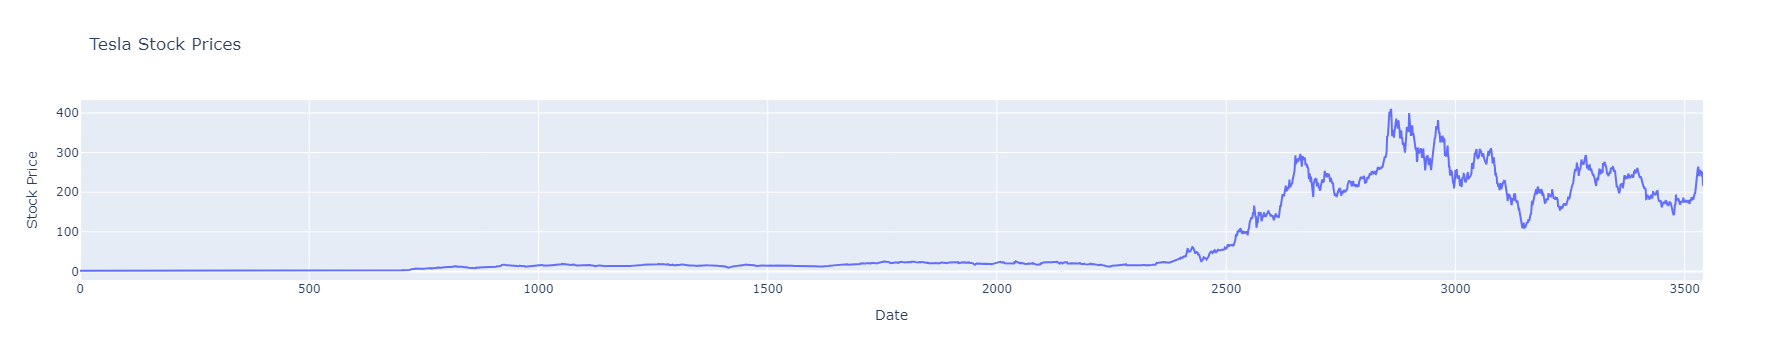

In [35]:
!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(tesla_data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tesla_data.index, y=tesla_data['Close'], mode='lines', name='Close Price'))
    fig.update_layout(title_text=title, xaxis_title='Date', yaxis_title='Stock Price')
    fig.show()
make_graph(tesla_data, 'Tesla Stock Prices')


# Question 6: Plot GameStop stock chart

Use the make_graph function to plot GameStop stock data, and also provide a title for the graph.

[*********************100%%**********************]  1 of 1 completed


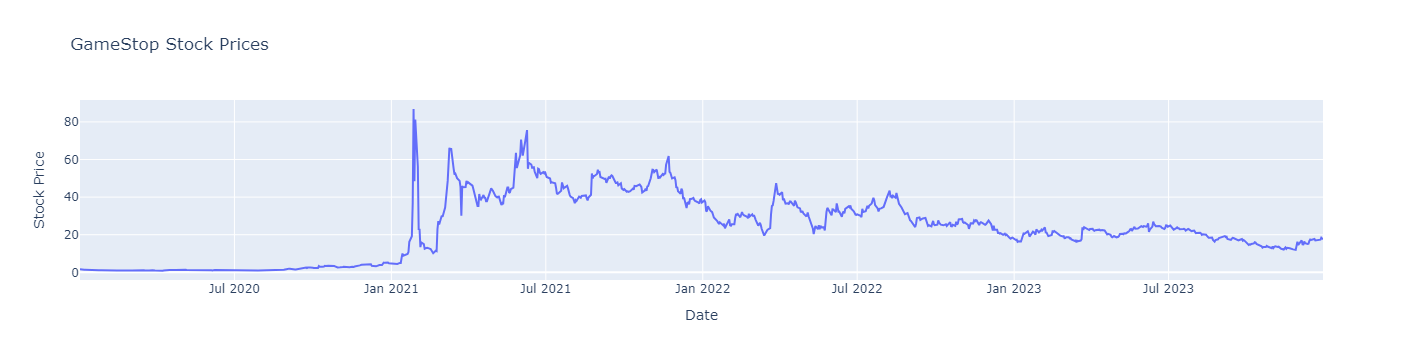

In [34]:
!pip install plotly
import plotly.graph_objects as go
def make_graph(stock_data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price'))
    fig.update_layout(title_text=title, xaxis_title='Date', yaxis_title='Stock Price')
    fig.show()
import yfinance as yf
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')
make_graph(gme_data, 'GameStop Stock Prices')
